 # 서포트 벡터 머신 (SVM)

###  박태영 교수
### 연세대학교 응용통계학과

### Outline

### 3. 비선형 SVM
    3.1 가우시안 RBF SVM
    3.2 금융 데이터 예제
    3.3 제조 데이터 예제

#### 3.1 가우시안 RBF SVM

- 필요한 모듈을 설치

In [2]:
!pip install mlxtend

  Obtaining dependency information for mlxtend from https://files.pythonhosted.org/packages/73/da/d5d77a9a7a135c948dbf8d3b873655b105a152d69e590150c83d23c3d070/mlxtend-0.23.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------- ----------------------------- 0.4/1.4 MB 11.2 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 18.5 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches 
from IPython.display import Image
from mlxtend.plotting import plot_decision_regions

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

- XOR 예제

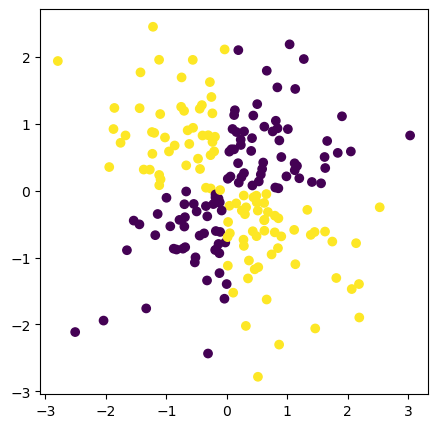

In [3]:
data = pd.read_csv(r'C:\Users\Desktop\data\XOR.csv')
X = data[['x1','x2']].values
y = data['y'].values

plt.rcParams["figure.figsize"] = (5,5)
plt.scatter('x1','x2',c='y',data=data)
plt.show()

- 결정 영역 그림에 대한 옵션

In [4]:
import warnings
warnings.filterwarnings(action='ignore')

scatter_kwargs = {'edgecolor': None, 'alpha': 0.7}
contourf_kwargs = {'alpha': 0.2}

- gamma와 C의 입력값을 받아 가우시안 RBF 커널을 이용한 비선형 SVM의 결정 영역을 시각화하는 함수

In [5]:
def decision_region(gamma,C):
    svm = SVC(kernel='rbf', random_state=1, gamma=gamma, C=C) 
    svm.fit(X, y)
    plot_decision_regions(X, y, clf=svm, 
                          scatter_kwargs=scatter_kwargs,
                          contourf_kwargs=contourf_kwargs)
    plt.legend(loc='upper left')
    plt.title('$\gamma$ = {},  $C$ = {}'.format(gamma,C),size=10)

- gamma와 C의 값의 모든 조합에 대한 가우시안 RBF SVM의 결정 영역 시각화

In [ ]:
par_g = [0.01, 1, 100]
par_c = [0.01, 1, 100]
k = 1

plt.rcParams["figure.figsize"] = (10,10)
for gamma in par_g:
    for C in par_c:
        loc = int(str(len(par_g))+str(len(par_c))+str(k))
        k += 1
        plt.subplot(loc)
        decision_region(gamma,C)
        
plt.savefig('RBF_SVM.png', dpi=300)
plt.show()

#### 3.2 금융 데이터 예제

- 포르투갈 은행의 전화 설문을 통한 고객 정보와 **정기 예금** 가입 여부(1:여, 0:부)
- 출처: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing     

In [ ]:
data = pd.read_csv(r'C:\Users\hopio\Desktop\yonsei_practice\data\Bank.csv')
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

- `X` 변수
   1. `age`: **나이** (numeric)
   2. `balance`: **연평균잔고(단위:유로)** (numeric) 
   3. `duration`: **마지막 접촉 이후 기간(단위:초)** (numeric)
   4. `marital_married`: **기혼 여부** ("married" or not)
   5. `marital_single`: **미혼 여부** ("single" or not)
   6. `education_secondary`: **중등교육 여부** ("secondary" or not)
   7. `education_tertiary`: **고등교육 여부** ("tertiary" or not)
   8. `education_unknown`: **교육수준의 결측 여부** ("secondary" or not)
   9. `housing`: **주택담보대출 여부** ("yes" or "no")
   10. `loan`: **개인담보대출 여부** ("yes" or "no")
   11. `poutcome_other`: **이전 마케팅의 결과는 other** ("yes" or "no")
   12. `poutcome_success`: **이전 마케팅의 결과는 성공** ("yes" or "no")
   13. `poutcome_unknown`: **이전 마케팅의 결과는 모름** ("yes" or "no")
   
   
- `y` 변수
    - `y`: **정기 예금 가입 여부** ("yes" or "no")

- 데이터의 70%를 훈련용(`train`)으로 사용하고 나머지 30%를 테스트용(`test`)으로 사용하기 위해 분리
- `stratify=y`를 사용하여 훈련용 데이터와 테스트용 데이터의 `y` 비율이 동일하게 함 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

- 훈련용 데이터의 `X_train`를 표준화 (평균이 0, 표준편차가 1)
- 표준화를 통해 학습의 안전성과 속도를 높임

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(X_train) # training data의 X에 대한 평균과 표준편차를 계산

X_train_std = sc.transform(X_train) # 표준화
X_test_std  = sc.transform(X_test) # 표준화

X_combined_std = np.vstack((X_train_std, X_test_std)) # 전체 데이터
y_combined = np.hstack((y_train, y_test)) # 전체 데이터

- 훈련용 데이터에 비선형 SVM 학습

In [ ]:
svm1 = SVC(kernel='linear')
svm2 = SVC(kernel='rbf', gamma='auto', C=1)
svm3 = SVC(kernel='sigmoid', gamma='auto', C=1)
svm4 = SVC(kernel='poly', gamma='auto', C=1)

svm1.fit(X_train_std, y_train)
svm2.fit(X_train_std, y_train)
svm3.fit(X_train_std, y_train)
svm4.fit(X_train_std, y_train)

- 테스트용 데이터에 비선형 SVM 성능 측정

In [ ]:
y_pred1 = svm1.predict(X_test_std)
y_pred2 = svm2.predict(X_test_std)
y_pred3 = svm3.predict(X_test_std)
y_pred4 = svm4.predict(X_test_std)

- 정확도, 정밀도, 재현율, F1점수를 기준으로 알고리즘 비교

In [ ]:
def scores(y_pred):
    out = pd.Series([accuracy_score(y_test, y_pred), 
                     precision_score(y_test, y_pred),
                     recall_score(y_test, y_pred),
                     f1_score(y_test, y_pred)],
                    ['Accuracy', 'Precision', 'Recall', 'F1 score'])
    return out

In [ ]:
out1 = scores(y_pred1)
out2 = scores(y_pred2)
out3 = scores(y_pred3)
out4 = scores(y_pred4)

pd.DataFrame([out1,out2,out3,out4], index=['Linear', 'RBF', 'Sigmoid', 'Polynomial'])

#### 3.3 제조 데이터 예제

- 반도체 생산 과정에서 590개의 센서로부터 얻은 데이터
- 590개의 숫자형 특성변수, **정상/비정상**에 대한 범주변수(-1:정상,1:비정상)로 구성
- 목적: 새로운 반도체 센서 데이터가 주어졌을 때, 비정상을 예측 분류
- 출처: http://archive.ics.uci.edu/ml/datasets/secom  

In [ ]:
data = pd.read_csv('Secom.csv')
print(data.shape)
data.head()

- 특성 변수별 결측 비율의 시각화

In [ ]:
missing = data.isnull().sum() / len(data)

plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.boxplot(missing)
plt.ylabel('Missing data proportion')

plt.subplot(122)
plt.bar(range(len(data.columns)), missing)
plt.xlabel('Feature')
plt.ylabel('Missing data proportion')

print('Number of columns with missing data : %d' %sum(missing > 0))

- 결측 비율이 10%이상인 특성 변수 제외

In [ ]:
data_com = data.loc[:,[x < 0.1 for x in missing]]
sum(missing >= 0.1)

- 결측값의 평균값 대체

In [ ]:
data1 = data2 = data_com

data1.fillna(method = 'ffill', inplace = True) # 앞의 값으로 대체
data2.fillna(method = 'bfill', inplace = True) # 뒤의 값으로 대체

In [ ]:
data_com = (data1+data2)/2

- 특성 변수 및 범주 변수의 정의

In [ ]:
X = data_com.iloc[:,:-1]
y = (data_com.iloc[:,-1]+1)/2

- 과대표집(oversampling)을 이용한 보정을 위해 필요한 모듈 설치
- SMOTE (Synthetic Minority Oversampling Technique)을 사용하기 위해 필요한 모듈 설치

In [ ]:
!pip install imblearn 

- SMOTE를 불러올 때 `delayed` 모듈이 없다는 에러가 발생하는 경우, 아래의 코드에서 #을 제거 후 실행하여 설치
- 설치 후 반드시 아나콘다를 완전히 종료하고 다시 실행

In [ ]:
# !pip install delayed # 설치 후 아나콘다를 종료하고 다시 실행

In [ ]:
from imblearn.over_sampling import SMOTE

SMOTE = SMOTE()
X2, y2 = SMOTE.fit_resample(X, y)

In [ ]:
X.shape, X2.shape

- 데이터의 70%를 훈련용(`train`)으로 사용하고 나머지 30%를 테스트용(`test`)으로 사용하기 위해 분리
- `stratify=y`를 사용하여 훈련용 데이터와 테스트용 데이터의 `y` 비율이 동일하게 함 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.3, random_state=1, stratify=y2)

In [ ]:
print('Labels counts in y:', np.bincount(y2))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

- 훈련용 데이터의 `X_train`를 표준화 (평균이 0, 표준편차가 1)
- 표준화를 통해 학습의 안전성과 속도를 높임

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(X_train) # training data의 X에 대한 평균과 표준편차를 계산

X_train_std = sc.transform(X_train) # 표준화
X_test_std  = sc.transform(X_test) # 표준화

X_combined_std = np.vstack((X_train_std, X_test_std)) # 전체 데이터
y_combined = np.hstack((y_train, y_test)) # 전체 데이터

In [ ]:
print(np.mean(X_train_std), np.std(X_train_std))

In [ ]:
print(np.mean(X_test_std), np.std(X_test_std))

- 훈련용 데이터에 비선형 SVM 학습

In [ ]:
svm1 = SVC(kernel='linear')
svm2 = SVC(kernel='rbf', gamma='auto', C=1)
svm3 = SVC(kernel='sigmoid', gamma='auto', C=1)
svm4 = SVC(kernel='poly', gamma='auto', C=1)

svm1.fit(X_train_std, y_train)
svm2.fit(X_train_std, y_train)
svm3.fit(X_train_std, y_train)
svm4.fit(X_train_std, y_train)

- 테스트용 데이터에 비선형 SVM 성능 측정

In [ ]:
y_pred1 = svm1.predict(X_test_std)
y_pred2 = svm2.predict(X_test_std)
y_pred3 = svm3.predict(X_test_std)
y_pred4 = svm4.predict(X_test_std)

In [ ]:
out1 = scores(y_pred1)
out2 = scores(y_pred2)
out3 = scores(y_pred3)
out4 = scores(y_pred4)

pd.DataFrame([out1,out2,out3,out4], index=['Linear', 'RBF', 'Sigmoid', 'Polynomial'])